In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment
## 2. Make ‘PassengerId’ as the index column

In [2]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')


In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

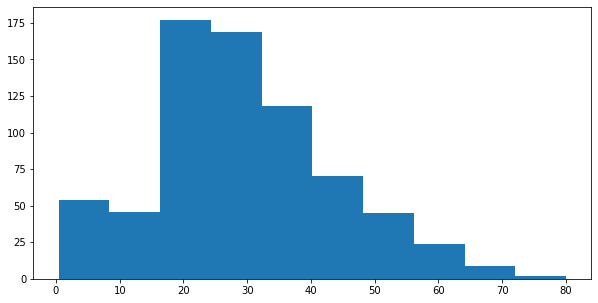

In [8]:
plt.figure(figsize=(10,5))
plt.hist(data['Age'])
plt.show

In [9]:
#Here we can use median for filling the missing values since the data distribution is skewed

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
data['Age'].isna().sum()

0

<AxesSubplot:xlabel='Cabin', ylabel='count'>

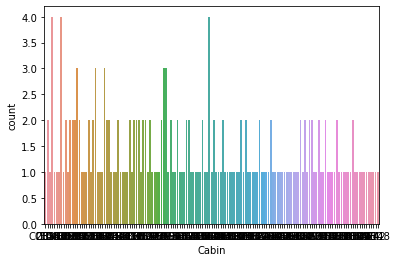

In [12]:
sns.countplot(x=data['Cabin'])

In [13]:
#Here we can use mode for missing value since the data is skewed also it is a categorical data

In [14]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [15]:
data['Cabin'].isna().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='count'>

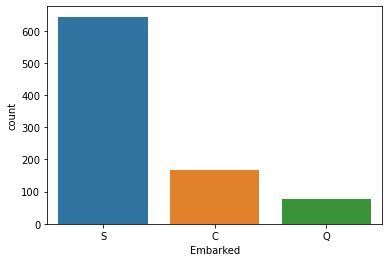

In [16]:
sns.countplot(x=data['Embarked'])

In [17]:
#Here we can use mode for missing value since the data is skewed also it is a categorical data

In [18]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [19]:
data['Cabin'].isna().sum()

0

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

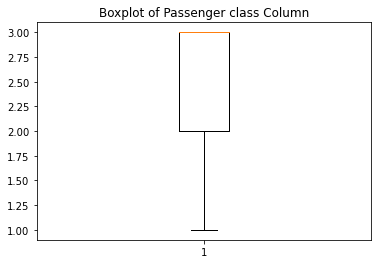

In [21]:
plt.boxplot(data['Pclass'])
plt.title("Boxplot of Passenger class Column")
plt.show()

In [22]:
Q1=np.percentile(data['Pclass'],25, interpolation='midpoint')

Q2=np.percentile(data['Pclass'],50, interpolation='midpoint')

Q3=np.percentile(data['Pclass'],75, interpolation='midpoint')

print(Q1)

print(Q2)

print(Q3)

2.0
3.0
3.0


In [23]:
data['Pclass'].median()

3.0

In [24]:
IQR=Q3-Q1
print(IQR)

1.0


In [25]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

0.5
4.5


In [26]:
outlier=[]

for x in data['Pclass']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [27]:
outlier

[]

In [28]:
#Here is no outlier

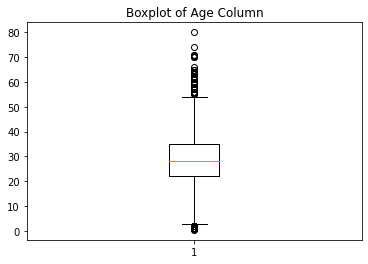

In [29]:
plt.boxplot(data['Age'])
plt.title("Boxplot of Age Column")
plt.show()

In [30]:
Q1=np.percentile(data['Age'],25, interpolation='midpoint')

Q2=np.percentile(data['Age'],50, interpolation='midpoint')

Q3=np.percentile(data['Age'],75, interpolation='midpoint')

print(Q1)

print(Q2)

print(Q3)

22.0
28.0
35.0


In [31]:
data['Age'].median()

28.0

In [32]:
IQR=Q3-Q1
print(IQR)

13.0


In [33]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [34]:
outlier=[]

for x in data['Age']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [35]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [36]:
ind=data['Age']>up_lim

In [37]:
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [38]:
#these are the outliers of age column

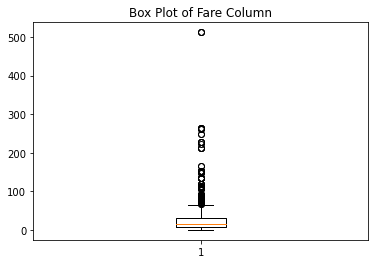

In [39]:
plt.boxplot(data['Fare'])
plt.title('Box Plot of Fare Column')
plt.show()

In [40]:
Q1=np.percentile(data['Fare'],25, interpolation='midpoint')

Q2=np.percentile(data['Fare'],50, interpolation='midpoint')

Q3=np.percentile(data['Fare'],75, interpolation='midpoint')

print(Q1)

print(Q2)

print(Q3)

7.9104
14.4542
31.0


In [41]:
data['Fare'].median()

14.4542

In [42]:
IQR=Q3-Q1
print(IQR)

23.0896


In [43]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-26.724
65.6344


In [44]:
outlier=[]

for x in data['Fare']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [45]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [46]:
ind=data['Fare']>up_lim

In [47]:
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [48]:
#these are the outliers of fare column

In [49]:
#Label Encoding

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder=LabelEncoder()

In [52]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [53]:
#Linear Regression

In [54]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


In [55]:
data1=data.drop(['Name','Ticket','Cabin','Embarked'],axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


In [56]:
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [58]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [59]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [60]:
print('Mean Squared Error is',mean_squared_error(y_test,predictions))

Mean Squared Error is 0.1354792080898344


In [61]:
print('R Squared Value is',r2_score(y_test,predictions))

R Squared Value is 0.4413269875924859


In [62]:
#min max scaling

In [63]:
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [64]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [66]:
X=min_max_scaler.fit_transform(X)

In [67]:
type(X)

numpy.ndarray

In [68]:
X= pd.DataFrame(X, columns=['Pclass','Sex','Age','SibSp','Parch','Fare'])

In [69]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.477990,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [71]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [72]:
print('Mean Squared Error is',mean_squared_error(y_test,predictions))

Mean Squared Error is 0.13547920808983488


In [73]:
print('R Squared Value is',r2_score(y_test,predictions))

R Squared Value is 0.441326987592484


In [74]:
#here min max scaling has no effect on this dataset